### Задание №1 ###

Импортируйте библиотеки Pandas, Numpy и Matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn

In [2]:
from sklearn.datasets import load_boston

Создайте датафреймы X и y из этих данных

In [3]:
boston = load_boston()
df = pd.DataFrame(boston.data)
df.columns = boston.feature_names
df['PRICE'] = boston.target
df.head(2)
X = df.drop('PRICE', axis=1)
y = df['PRICE']
print(X.shape)
print(y.shape)

(506, 13)
(506,)


Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 42)

print(X_train.shape)
print(X_test.shape)

(404, 13)
(102, 13)


Масштабируйте данные с помощью StandardScaler

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=boston.feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=boston.feature_names)

Постройте модель TSNE на тренировочных данных с параметрами: n_components=2, learning_rate=250, random_state=42

In [6]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)
X_train_tsne.shape

(404, 2)

Постройте диаграмму рассеяния на этих данных.

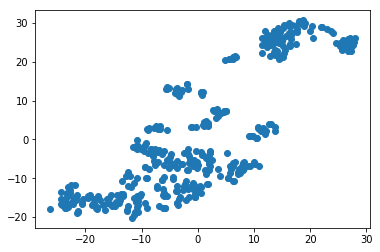

In [7]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

### Задание 2 ###

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train. Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
kmean_x_train = kmeans.fit_transform(X_train)

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.

2    191
1    127
0     86
dtype: int64


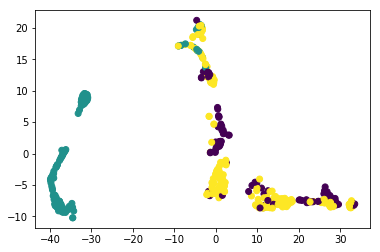

In [9]:
labels_train = kmeans.fit_predict(X_train_scaled)
print(pd.value_counts(labels_train))
X_train_tsne = tsne.fit_transform(kmean_x_train)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

Вычислите средние значения price и CRIM в разных кластерах.

In [10]:
X_train['PRICE'] = y_train
print(X_train.loc[labels_train==0, 'PRICE'].mean())
print(X_train.loc[labels_train==0, 'CRIM'].mean())

27.788372093023252
0.07356558139534886


C:\Users\dmitr\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
print(X_train.loc[labels_train==1, 'PRICE'].mean())
print(X_train.loc[labels_train==1, 'CRIM'].mean())

16.165354330708666
10.797028425196853


In [12]:
print(X_train.loc[labels_train==2, 'PRICE'].mean())
print(X_train.loc[labels_train==2, 'CRIM'].mean())

24.958115183246072
0.42166020942408367


### Задание со звездочкой ###

Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора. Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

1    53
2    35
0    14
dtype: int64


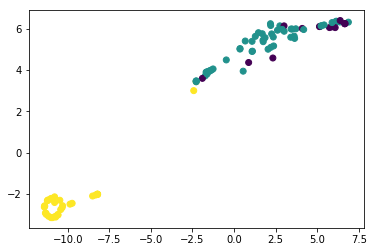

In [13]:
kmean_x_test = kmeans.fit_transform(X_test)
labels_test = kmeans.fit_predict(X_test_scaled)
print(pd.value_counts(labels_test))
X_test_tsne = tsne.fit_transform(kmean_x_test)
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)

In [14]:
X_test['PRICE'] = y_test
print(X_test.loc[labels_test==0, 'PRICE'].mean())
print(X_test.loc[labels_test==0, 'CRIM'].mean())

33.871428571428574
0.08618571428571427


C:\Users\dmitr\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
print(X_test.loc[labels_test==1, 'PRICE'].mean())
print(X_test.loc[labels_test==1, 'CRIM'].mean())

21.552830188679245
0.25200716981132076


In [16]:
print(X_test.loc[labels_test==2, 'PRICE'].mean())
print(X_test.loc[labels_test==2, 'CRIM'].mean())

16.437142857142856
10.165531142857143
